# ADM1jl - Jupyter Notebook

A Jupyter notebook to demonstrate the functionality of ADM1jl, a Julia package that solves the Anaerobic Digestion Model 1.


In [1]:
using Pkg
# Pkg.add(url="https://github.com/CourtA96/ADM1jl") # uncomment this line to install ADM1jl if it is not already 
                                                    # installed on your device
using ADM1jl

┌ Info: Precompiling ADM1jl [fcba7d9c-eb10-42d4-b263-36979bb5b0d2]
└ @ Base loading.jl:1423


## Getting Started

To solve ADM1 for a single tank reactor, use `ADM1sol(tspan, u0, IV)` where:
- `tspan` is a `Tuple{Float64}` of length 2 that specifies the solution time range (in days)
- `u0` is a `Vector{Float64}` of length 35 that specifies the initial conditions
- `IV` is a `Vector{Float64}` of length 35 that specifies the inflow concentrations

The 35 state variables, and their indices, are given in the documentation [here](https://courta96.github.io/ADM1jl/page2/#State-Variables-and-their-Indices). 

`ADM1sol` uses the `DifferentialEquations` package to solve the system, it returns a `Tuple` of length 2 that contains the system's solution and the runtime in seconds. The solution is of type `ODESolution`, which is described in greater detail in the `DifferetialEquations` package documentaion [here](https://docs.sciml.ai/DiffEqDocs/stable/types/ode_types/#SciMLBase.ODESolution).

To use `ADM1sol`, first ensure that the file `model_parameters.csv` is installed in your working directory. The `model_parameters.csv` file can be found at the github repository [here](https://github.com/CourtA96/ADM1jl/blob/main/model_parameters.csv). If you are unsure of your working directory, run the following cell and the output will be your working directory.

In [2]:
pwd()

"C:\\Users\\court\\OneDrive - University of Guelph\\PhD\\Research\\Code\\ADM1jl\\ADM1jl"

Once `model_parameters.csv` is saved to your working directory, the `ADM1sol` function can be called by running the following cell:

In [3]:
u0 = ADM1jl.InitialConditions(); # The default initial condtions
IV = ADM1jl.inflowvector_definition(); # The default inflow concentrations
tspan = (0.0,1.0); # The solution for one day

sol,tSol = ADM1sol(tspan,u0,IV); # solving the system for tspan, u0, and IV 

The above cell assigns the solution to the variable `sol` and the runtime to the variable `tSol`. As mentioned above, the solution has the type `ODESolution`. An `ODESolution`has two fields, `.t` and `.u`, that contain the timesteps and the solution a each timestep. The following cell show how the timesteps breakdown:

In [4]:
println("There are a total of ", length(sol.t), " timesteps.")
println("\nThe initial time is: ", sol.t[1], " days \nand the solution at that time (ie. the inital conditions) is: ", sol.u[1])
println("\nThe first timestep is at time: ", sol.t[2], " days \nand the solution at that time is: ", sol.u[2])
println("\nThe final timestep is at time: ", sol.t[end], " days \nand the solution at that time is: ", sol.u[end])

There are a total of 100 timesteps.

The initial time is: 0.0 days 
and the solution at that time (ie. the inital conditions) is: [0.012, 0.0053, 0.099, 0.012, 0.013, 0.016, 0.2, 2.3e-7, 0.055, 0.15, 0.13, 0.33, 0.31, 0.028, 0.1, 0.029, 0.42, 1.18, 0.24, 0.43, 0.14, 0.76, 0.32, 25.6, 0.011, 0.013, 0.016, 0.2, 0.14, 0.0041, 0.04, 0.02, 1.02e-5, 1.63, 0.014]

The first timestep is at time: 1.998068760796162e-5 days 
and the solution at that time is: [0.011999986305998722, 0.005299528080754454, 0.09899995851630547, 0.011999757994309943, 0.013000244814496508, 0.015999974836690346, 0.19999987668832014, 2.3401029375177689e-7, 0.05500093731160939, 0.15000108782030885, 0.12999999991276787, 0.3299999999999931, 0.3099999860135961, 0.02799999200851338, 0.1000005194457082, 0.02900010089232123, 0.4200000021685973, 1.1799999954546017, 0.2400000012108326, 0.43000000150175316, 0.14000000206430346, 0.7600000026366445, 0.31999999753085123, 25.600000019980666, 0.01192369901260399, 0.013000159436964311, 0

To plot the solutions, use the `plotSols` command.

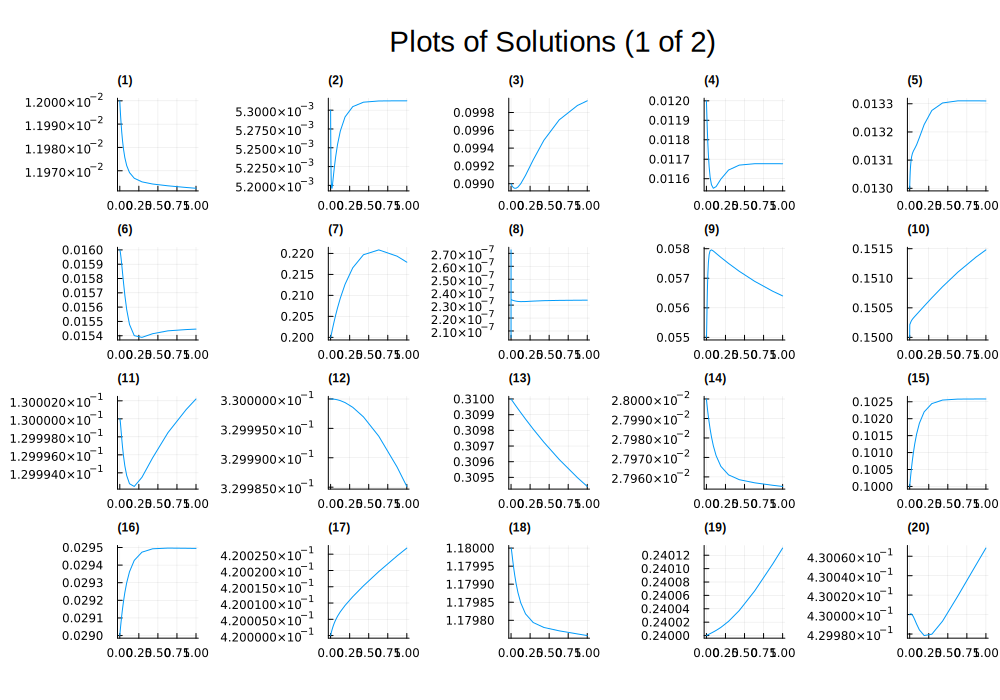

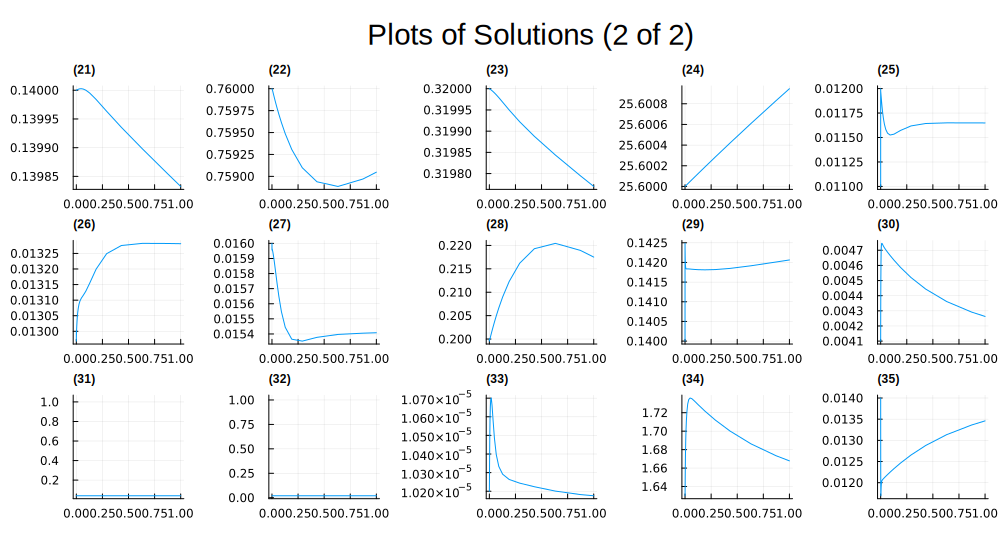

In [5]:
ADM1jl.plotSols(sol)

The runtime is a `Float64` that gives the runtime in seconds. When `ADM1sol` is called for the first time, it will be slower since it needs to is being compiled. After this initial call, it will be considerably faster. Look at the following example:

In [6]:
sol2,tSol2 = ADM1sol(tspan,u0,IV);

sol3,tSol3 = ADM1sol((0.0,200.0), 2*u0, 1.5*IV);

println("The initial runtime was: ", tSol, "\nThe time for the second run is: ", tSol2, "\nand the time for the third run (with new condtions) is: ", tSol3)

The initial runtime was: 58.097335
The time for the second run is: 0.3844027
and the time for the third run (with new condtions) is: 0.3213612


The inital runtime was approximately 33 seconds. However, the subsequent runtimes were approximately 0.2 seconds, even when the timespan of the solution increased from 1.0 day to 200.0 days.